In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [2]:
#reading the file
data = pd.read_csv('../../Data/f_churn.csv')
data.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [3]:
data = data.drop(['Unnamed: 0', 'Exited'], axis =1 )
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1


In [4]:
#shape of the data
data.shape

(10000, 12)

In [5]:
scaler =  StandardScaler()
df = scaler.fit_transform(data)

df = pd.DataFrame(data=df,columns=data.columns)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988


In [6]:
chi2,p = calculate_bartlett_sphericity(df)

print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  nan
p value :  nan


C:\Users\ASUS\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


In [7]:
kmo_all,kmo_model = calculate_kmo(df)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.4863760735548008


C:\Users\ASUS\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [8]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])

In [9]:
fa.fit(df)

FactorAnalyzer(impute='drop', n_factors=12, rotation=None, rotation_kwargs={})

In [10]:
fa.fit(df)

FactorAnalyzer(impute='drop', n_factors=12, rotation=None, rotation_kwargs={})

In [12]:
ev,_ = fa.get_eigenvalues()

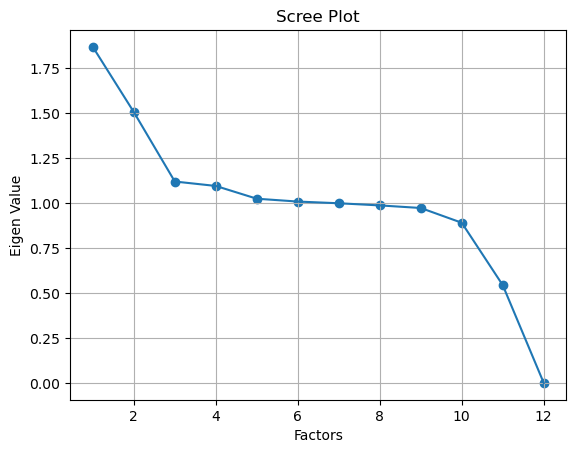

In [13]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [15]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [19]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

     EigenValues
0   1.865929e+00
1   1.504251e+00
2   1.118452e+00
3   1.093858e+00
4   1.022979e+00
5   1.007161e+00
6   9.977202e-01
7   9.857749e-01
8   9.714571e-01
9   8.894847e-01
10  5.429325e-01
11 -7.833430e-16


In [20]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.loadings_,index=df.columns))

                          0         1         2         3
CreditScore        0.006145 -0.001822  0.028471  0.003241
Age                0.007512  0.054325  0.083478 -0.034203
Tenure             0.008243 -0.012465 -0.022540  0.024257
Balance           -0.003836  0.566912 -0.006164 -0.100413
NumOfProducts      0.070958 -0.437259  0.181006  0.547662
HasCrCard         -0.006966 -0.002249 -0.007643  0.020570
IsActiveMember    -0.080011 -0.067534  0.933799 -0.334831
EstimatedSalary   -0.000240  0.004864 -0.005417  0.020332
Geography_France  -0.854694 -0.449143 -0.170065 -0.189360
Geography_Germany  0.088837  0.804950  0.235408  0.534172
Geography_Spain    0.900748 -0.288180 -0.039438 -0.317137
Gender            -0.001877  0.000187 -0.004471  0.046067


In [21]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          1.561408  1.453006  0.999071  0.848628
Proportional Var  0.130117  0.121084  0.083256  0.070719
Cumulative Var    0.130117  0.251201  0.334457  0.405176


In [22]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_uniquenesses(),index=df.columns,columns=['Uniqueness']))

                   Uniqueness
CreditScore          0.999138
Age                  0.988854
Tenure               0.998680
Balance              0.668475
NumOfProducts        0.471073
HasCrCard            0.999465
IsActiveMember       0.004944
EstimatedSalary      0.999534
Geography_France     0.002989
Geography_Germany    0.003406
Geography_Spain      0.003473
Gender               0.997854


In [24]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

                   Communalities
CreditScore             0.000862
Age                     0.011146
Tenure                  0.001320
Balance                 0.331525
NumOfProducts           0.528927
HasCrCard               0.000535
IsActiveMember          0.995056
EstimatedSalary         0.000466
Geography_France        0.997011
Geography_Germany       0.996594
Geography_Spain         0.996527
Gender                  0.002146


In [25]:
factor_df= pd.DataFrame(fa.loadings_,index=df.columns, columns=['Factor1', 'Factor2', 'Factor3' , 'Factor4'])

In [26]:
factor_df

,Factor1,Factor2,Factor3,Factor4
CreditScore,0.006145,-0.001822,0.028471,0.003241
Age,0.007512,0.054325,0.083478,-0.034203
Tenure,0.008243,-0.012465,-0.022540,0.024257
Balance,-0.003836,0.566912,-0.006164,-0.100413
NumOfProducts,0.070958,-0.437259,0.181006,0.547662
HasCrCard,-0.006966,-0.002249,-0.007643,0.020570
IsActiveMember,-0.080011,-0.067534,0.933799,-0.334831
EstimatedSalary,-0.000240,0.004864,-0.005417,0.020332
Geography_France,-0.854694,-0.449143,-0.170065,-0.189360
Geography_Germany,0.088837,0.804950,0.235408,0.534172
